<a href="https://colab.research.google.com/github/PeiLi-Sandman/machine_learning/blob/master/HW3/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

In [8]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-04-17 18:51:53--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  95.3MB/s    in 0.7s    

2019-04-17 18:51:54 (95.3 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [0]:
from keras.applications import VGG19

conv_base = VGG19(
    weights='imagenet', 
    include_top=False, 
    input_shape=(224, 224, 3))

last_output = conv_base.output

In [0]:
conv_base.trainable = False
for layer in conv_base.layers:
  layer.trainable = False

In [0]:
from keras.layers import Flatten, Dense
from keras import models
from keras import optimizers
from tensorflow.keras import Model


new = Flatten()(last_output)
new = Dense(256, activation='relu')(new)
new = Dense(1, activation='sigmoid')(new)

# Configure and compile the model
model = models.Model(conv_base.input, new)
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0001),
              metrics=['acc'])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [15]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

# data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [34]:
# compile model

model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=2e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 36s 358ms/step - loss: 0.6147 - acc: 0.6675 - val_loss: 0.4426 - val_acc: 0.7920
Epoch 2/30
100/100 [==============================] - 32s 320ms/step - loss: 0.4721 - acc: 0.7820 - val_loss: 0.3522 - val_acc: 0.8470
Epoch 3/30
100/100 [==============================] - 32s 317ms/step - loss: 0.4196 - acc: 0.8040 - val_loss: 0.2910 - val_acc: 0.8730
Epoch 4/30
100/100 [==============================] - 32s 317ms/step - loss: 0.3929 - acc: 0.8190 - val_loss: 0.2830 - val_acc: 0.8780
Epoch 5/30
100/100 [==============================] - 33s 330ms/step - loss: 0.3882 - acc: 0.8075 - val_loss: 0.3478 - val_acc: 0.8370
Epoch 6/30
100/100 [==============================] - 33s 331ms/step - loss: 0.3542 - acc: 0.8385 - val_loss: 0.2509 - val_acc: 0.8930
Epoch 7/30
100/100 [==============================] - 32s 318ms/step - loss: 0.3452 - acc: 0.8395 - val_loss: 0.2410 - val_acc: 0.9020
Epoch 8

In [0]:
model.save('model of problem 1.h5')

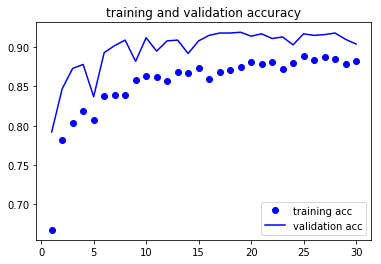

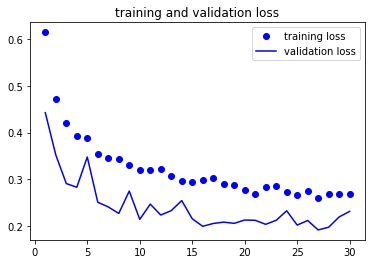

In [36]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

# Problem 2

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [18]:
# compile model

model.compile(
    loss='binary_crossentropy',
    #
    # choose a smaller learning rate
    #
    optimizer=optimizers.RMSprop(lr=1e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 40s 404ms/step - loss: 0.5210 - acc: 0.7360 - val_loss: 0.3418 - val_acc: 0.8480
Epoch 2/30
100/100 [==============================] - 33s 331ms/step - loss: 0.3258 - acc: 0.8535 - val_loss: 0.2564 - val_acc: 0.8720
Epoch 3/30
100/100 [==============================] - 33s 327ms/step - loss: 0.2620 - acc: 0.8880 - val_loss: 0.1938 - val_acc: 0.9130
Epoch 4/30
100/100 [==============================] - 33s 332ms/step - loss: 0.2251 - acc: 0.9015 - val_loss: 0.1474 - val_acc: 0.9430
Epoch 5/30
100/100 [==============================] - 33s 335ms/step - loss: 0.2175 - acc: 0.9145 - val_loss: 0.1295 - val_acc: 0.9480
Epoch 6/30
100/100 [==============================] - 35s 346ms/step - loss: 0.1904 - acc: 0.9210 - val_loss: 0.2869 - val_acc: 0.8700
Epoch 7/30
100/100 [==============================] - 33s 327ms/step - loss: 0.1575 - acc: 0.9380 - val_loss: 0.1111 - val_acc: 0.9540
Epoch 8

In [20]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 25.6MB/s 


In [0]:
# create on Colab directory
model.save('model of problem 2.h5')    
model_file = drive.CreateFile({'title' : 'model of problem 2.h5'})
model_file.SetContentFile('model of problem 2.h5')
model_file.Upload()

In [22]:
drive.CreateFile({'id': model_file.get('id')})

GoogleDriveFile({'id': '1rON4VBHufhULjvSi-PMxxq6GbIvGuKf2'})

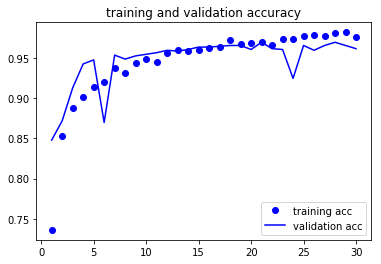

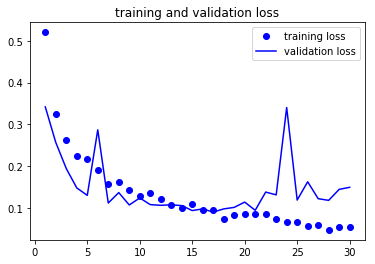

In [25]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

In [3]:
import keras

model = keras.models.load_model('model of problem 2.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


#Problem 3

In [34]:
!ls /tmp/cats_and_dogs_filtered/validation/cats | head -3
!ls /tmp/cats_and_dogs_filtered/validation/dogs | head -3

cat.2000.jpg
cat.2001.jpg
cat.2002.jpg
dog.2000.jpg
dog.2001.jpg
dog.2002.jpg


In [0]:
img_path1 = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2000.jpg'
img_path2 = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2001.jpg'
img_path3 = '/tmp/cats_and_dogs_filtered/validation/cats/cat.2000.jpg'
img_path4 = '/tmp/cats_and_dogs_filtered/validation/cats/cat.2001.jpg'

In [0]:
last_conv_layer = model.get_layer('block5_conv4')

In [0]:
import cv2
from google.colab.patches import cv2_imshow
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from keras import backend as K
from keras.applications.vgg19 import preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np

In [0]:
def show_superimposed_image(img_path, heatmap):

  img = cv2.imread(img_path)
  # resize the heatmap to be the same size as the original image
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

  heatmap = np.uint8(255 * heatmap)

  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  superimposed_img = heatmap * 0.4 + img

  cv2_imshow(superimposed_img)

In [0]:
def process_image(img_path, idx=0):
  img = image.load_img(img_path, target_size=(224, 224))
  #
  plt.imshow(img)
  plt.grid(None)
  plt.show()
  #
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  
  class_output = model.output[:, 0]
  
  grads = K.gradients(class_output, last_conv_layer.output)[0]

  pooled_grads = K.mean(grads, axis=(0, 1, 2))

  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

  pooled_grads_value, conv_layer_output_value = iterate([x])

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  plt.matshow(heatmap)
  plt.grid(None)
  plt.show()
  #
  show_superimposed_image(img_path, heatmap)

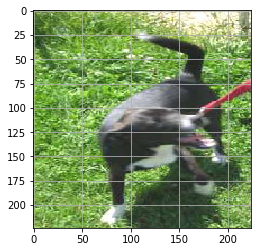

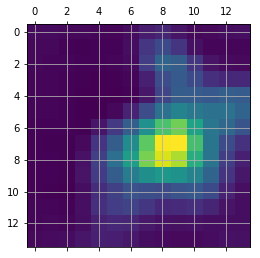

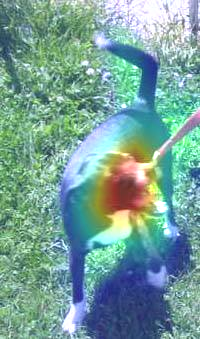

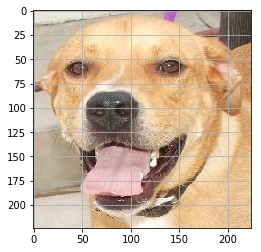

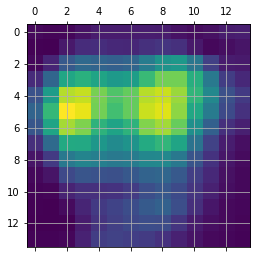

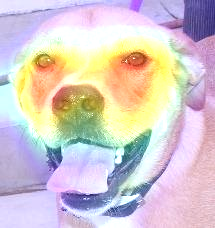

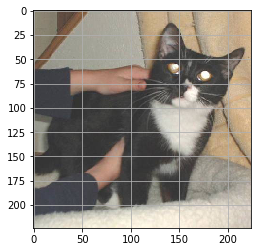

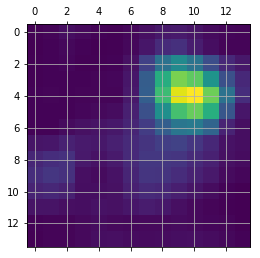

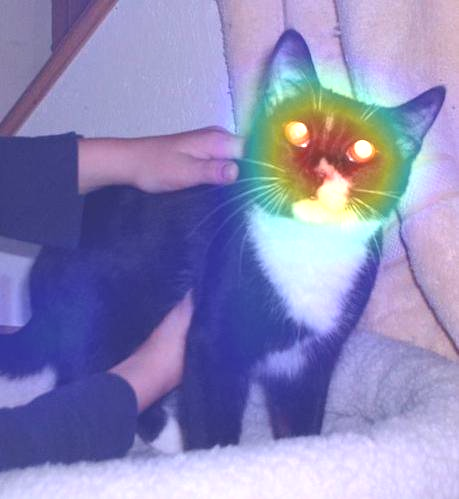

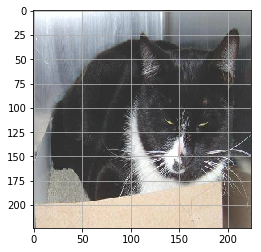

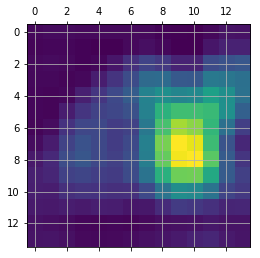

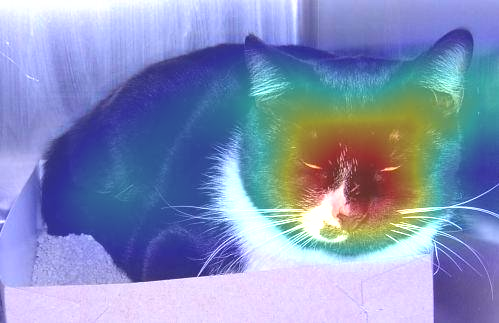

In [60]:
process_image(img_path1)
process_image(img_path2)
process_image(img_path3)
process_image(img_path4)

#Problem 4

In [0]:
class_names = ['cat','dog']

In [22]:
from keras import models

layer = model.get_layer('dense_1')

#layer_outputs = [layer.output for layer in model.layers[1:-4]]

layer_outputs = layer.output

activation_model = models.Model(input=model.input, outputs=layer_outputs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  if __name__ == '__main__':


In [0]:
data = []     # store all the generated data batches
labels = []   # store all the generated label batches
max_iter = 50  # maximum number of iterations, in each iteration one batch is generated; the proper value depends on batch size and size of whole data
i = 0
for d, l in validation_generator:
    data.append(d)
    labels.append(l)
    i += 1
    if i == max_iter:
        break

In [0]:
import numpy as np

data = np.array(data)
data = np.reshape(data, (data.shape[0]*data.shape[1],) + data.shape[2:])

labels = np.array(labels)
labels = np.reshape(labels, (labels.shape[0]*labels.shape[1],) + labels.shape[2:])

In [0]:
activations = activation_model.predict(data)

In [73]:
data.shape

(1000, 224, 224, 3)

In [0]:
labels = labels.tolist()

In [0]:
labels = list(map(int, labels))

In [0]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline
import seaborn as sns

In [0]:
activations = activation_model.predict_generator(validation_generator, steps=50)

In [0]:
def data_scatter(vecs, labels):
 
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("husl", num_classes))

    # scatter plot.
    f = plt.figure(figsize=(12, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(vecs[:, 0], vecs[:, 1], c=palette[labels])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')


    for idx in range(num_classes):

        # Place label at median position of vectors with corresponding label

        x_coord, y_coord = np.median(vecs[labels == idx, :], axis=0)
        txt = ax.text(x_coord, y_coord, class_names[idx], fontsize=16)
        # plot class index black with white contour
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=6, foreground="w"),
            PathEffects.Normal()])

In [75]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

fashion_tsne = TSNE(random_state=42).fit_transform(activations)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))

t-SNE done! Time elapsed: 7.803271770477295 seconds


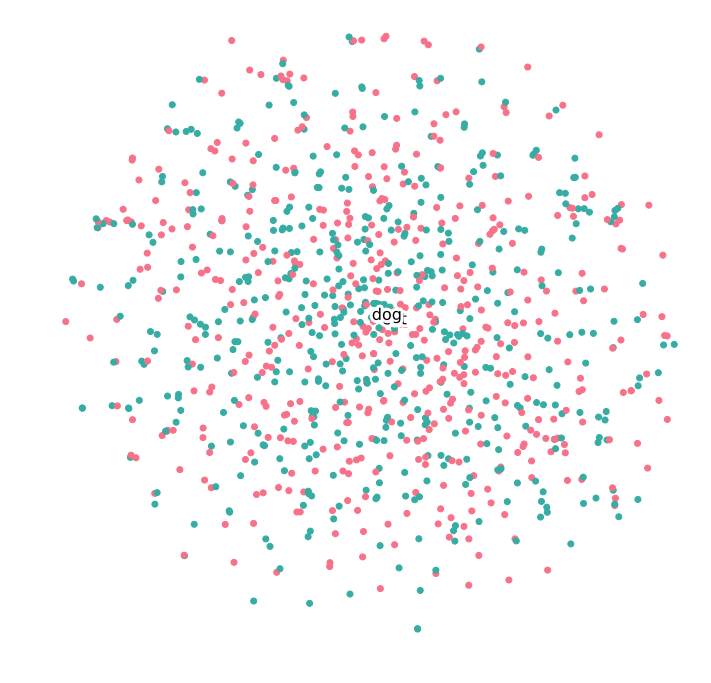

In [84]:
labels = validation_generator.classes
np.random.shuffle(labels)
labels = labels[:1000]
data_scatter(fashion_tsne, labels)

In [82]:
activations.shape

(1000, 256)